

"""
## Exploratory Data Analysis (EDA)
 - Dataset: Weekly sales data for multiple products
 - Purpose: Understand trends, seasonality, gaps, and structure for modeling
"""


## SECTION 1: Load & Inspect the Data

# 1.1 Importing Libraries

In [146]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 368.3 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.8 MB 368.3 kB/s eta 0:00:26
   -- ------------------------------------- 0.5/9.8 MB 368.3 kB/s eta 0:00:26
   --- ------------------------------------ 0.8/9.8 MB 391.3 kB/s eta 0:00:24
   --- ------------------------------------ 0.8/9.8 MB 391


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
# Importing all the necessary libraries for data analysis


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline


pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")


#  1.2 Load the dataset

In [157]:
# Load dataset
file_path = '../data/Assessment-2-Associate-DS(in).csv'
df = pd.read_csv(file_path)

df.head()


,weekend_date,channel,brand,category,sub_category,SerailNum,quantity
0,4/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,56
1,11/6/2022,Channel1,B1,Cat2,Sub-Cat2,1,122
2,18/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,102
3,25/06/2022,Channel1,B1,Cat2,Sub-Cat2,1,128
4,2/7/2022,Channel1,B1,Cat2,Sub-Cat2,1,97


# 1.2.1 Correct column name typo

In [158]:

df.rename(columns={'SerailNum': 'SerialNum'}, inplace=True)


# 1.3 Data Shape and Data Types

In [159]:
print("-------------- Dataset Shape --------------")

print("Number of rows in dataset:", df.shape[0])

print("Number of Columns in dataset:", df.shape[1])



-------------- Dataset Shape --------------
Number of rows in dataset: 600
Number of Columns in dataset: 7


In [160]:
print("-------------- Data Type --------------")

df.info()

-------------- Data Type --------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekend_date  600 non-null    object
 1   channel       600 non-null    object
 2   brand         600 non-null    object
 3   category      600 non-null    object
 4   sub_category  600 non-null    object
 5   SerialNum     600 non-null    int64 
 6   quantity      600 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 32.9+ KB


# 1.4 Check for Null Values

In [161]:
print("-------------- Null Values --------------")

df.isnull().sum()

-------------- Null Values --------------


weekend_date    0
channel         0
brand           0
category        0
sub_category    0
SerialNum       0
quantity        0
dtype: int64

-------------- Null Value Visualization --------------


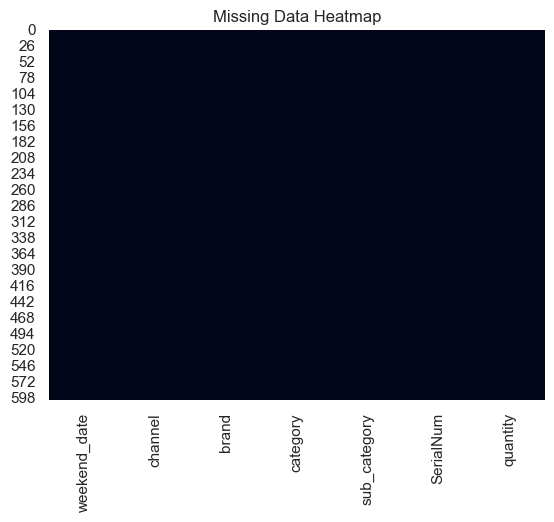

In [162]:
print("-------------- Null Value Visualization --------------")

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# 1.5 Check For Duplicate

In [163]:
print("-------------- Duplicate Values --------------")

df.duplicated().sum()

-------------- Duplicate Values --------------


np.int64(0)

## SECTION 2: Descriptive Statistics

# 2.1 Describe numerical column

In [164]:

df['quantity'].describe()

count     600.000000
mean      547.330000
std       925.749108
min         1.000000
25%       121.000000
50%       244.500000
75%       624.500000
max      8051.000000
Name: quantity, dtype: float64

# 2.2 Describe categorical columns

In [165]:

for col in ['channel', 'brand', 'category', 'sub_category']:
    print(f"\n {col} Summary:")
    print(df[col].value_counts())



 channel Summary:
channel
Channel2    376
Channel1    118
Channel3    106
Name: count, dtype: int64

 brand Summary:
brand
B1    418
B2    182
Name: count, dtype: int64

 category Summary:
category
Cat3    373
Cat2    118
Cat1    109
Name: count, dtype: int64

 sub_category Summary:
sub_category
Sub-Cat4    191
Sub-Cat3    182
Sub-Cat2    118
Sub-Cat1    109
Name: count, dtype: int64


## SECTION 3: Data Cleaning & Date Handling

# 3.1 Convert weekend_date to datetime

In [166]:
df['weekend_date'] = pd.to_datetime(df['weekend_date'], dayfirst=True, errors='coerce')



# 3.1.1 Fill weekend_date using forward then backward fill

In [167]:

df['weekend_date'] = df['weekend_date'].fillna(method='ffill').fillna(method='bfill')


C:\Users\bhavi\AppData\Local\Temp\ipykernel_27540\3523666755.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weekend_date'] = df['weekend_date'].fillna(method='ffill').fillna(method='bfill')


# 3.2 Sort data

In [168]:
df.sort_values(by=['SerialNum', 'weekend_date'], inplace=True)

## SECTION 4: Time Series Sanity Checks

# 4.1 Count unique products

In [169]:
print("Unique Products (SerialNum):", df['SerialNum'].nunique())


Unique Products (SerialNum): 5


# 4.2 Weekly frequency check per SerialNum

In [170]:
# Ensure weekend_date is datetime
df['weekend_date'] = pd.to_datetime(df['weekend_date'], errors='coerce')

serial_sample = df['SerialNum'].sample(3, random_state=42).values
for s in serial_sample:
    sub = df[df['SerialNum'] == s]
    print(f"\n SerialNum: {s}")
    print("Missing Weeks:", sub['weekend_date'].diff().value_counts())


 SerialNum: 1
Missing Weeks: weekend_date
7 days    117
Name: count, dtype: int64

 SerialNum: 4
Missing Weeks: weekend_date
7 days    84
0 days    72
Name: count, dtype: int64

 SerialNum: 5
Missing Weeks: weekend_date
7 days     107
14 days      1
Name: count, dtype: int64


## 📊 Weekly Data Consistency Analysis by Serial Number

To evaluate the consistency and completeness of our sales data, we analyzed how frequently transactions occurred week by week for different `SerialNum` entries. This helps us ensure the dataset is suitable for time-based analysis and forecasting.

---

### 🔹 SerialNum: 1
- All records occur at **7-day intervals**, representing a **perfect weekly pattern**.
- Indicates **no missing weeks** and consistent data logging.

---

### 🔹 SerialNum: 4
- Majority of records are 7 days apart, which aligns with weekly frequency.
- However, **some records share the same weekend date**, suggesting:
  - Multiple transactions happened in the same week.
- This is expected in some retail environments and is not an error.

---

### 🔹 SerialNum: 5
- Most records follow a weekly pattern (7-day gaps).
- One gap of **14 days** was detected, which may indicate:
  - A **missing week** in the dataset for this SerialNum.

---

### Summary
- The dataset is **mostly consistent on a weekly basis**.
- We identified:
  - **Consistent weekly activity** for most SerialNums.
  - **Multiple entries in the same week** for some products.
  - **One potential missing week** in SerialNum 5.
- These observations will be taken into account during **data cleaning**, **feature engineering**, and **forecast modeling** stages.



# 4.3 Are there missing weeks globally?

In [171]:

all_weeks = pd.date_range(start=df['weekend_date'].min(), end=df['weekend_date'].max(), freq='W-SUN')
missing_weeks = set(all_weeks) - set(df['weekend_date'].unique())
print("🕳️ Globally Missing Weeks:", len(missing_weeks))

🕳️ Globally Missing Weeks: 118


## SECTION 5: Feature Distributions & Sales Trends

# 5.1 Quantity distribution

C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


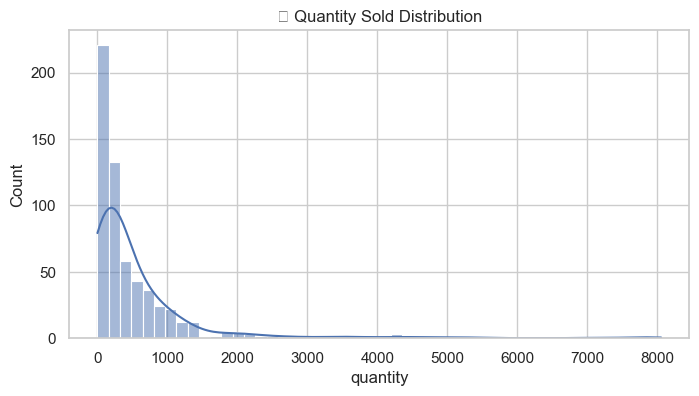

In [172]:

plt.figure(figsize=(8, 4))
sns.histplot(df['quantity'], bins=50, kde=True)
plt.title("📦 Quantity Sold Distribution")
plt.show()


# 5.2 Weekly total sales over time

C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


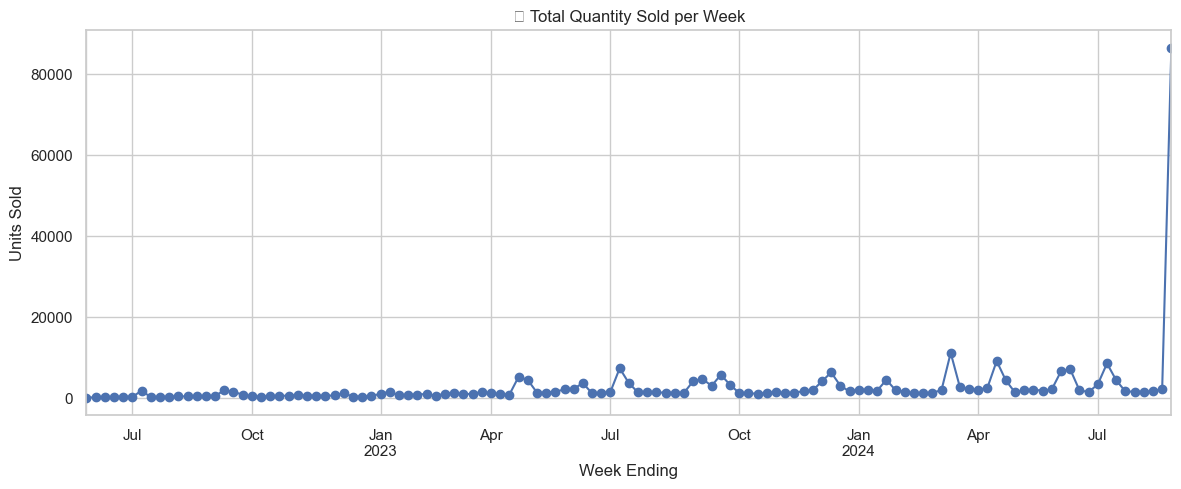

In [173]:

weekly = df.groupby('weekend_date')['quantity'].sum()

plt.figure(figsize=(14, 5))
weekly.plot(marker='o')
plt.title("📊 Total Quantity Sold per Week")
plt.ylabel("Units Sold")
plt.xlabel("Week Ending")
plt.grid(True)
plt.show()


# 5.3 Top N product trends

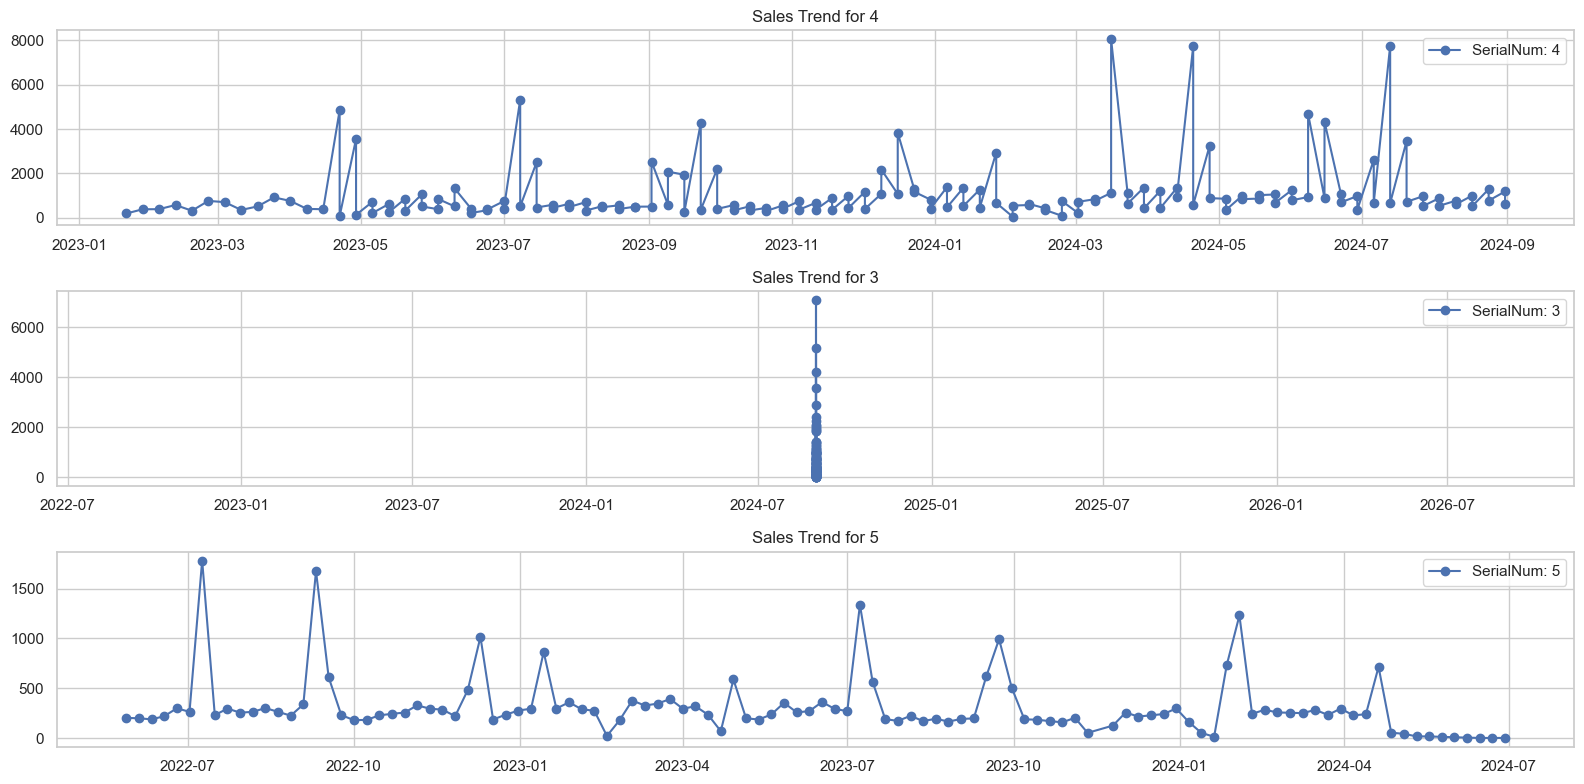

In [174]:

top_serials = df.groupby('SerialNum')['quantity'].sum().sort_values(ascending=False).head(3).index

plt.figure(figsize=(16, 8))
for i, s in enumerate(top_serials):
    sub = df[df['SerialNum'] == s]
    plt.subplot(3, 1, i + 1)
    plt.plot(sub['weekend_date'], sub['quantity'], marker='o', label=f"SerialNum: {s}")
    plt.legend()
    plt.title(f"Sales Trend for {s}")
    plt.grid(True)

plt.tight_layout()
plt.show()


## SECTION 6: Seasonality & Categorical Impact

# 6.1 Add month and year for seasonality check

In [175]:

df['year'] = df['weekend_date'].dt.year
df['month'] = df['weekend_date'].dt.month


# 6.2 Heatmap of monthly sales

C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


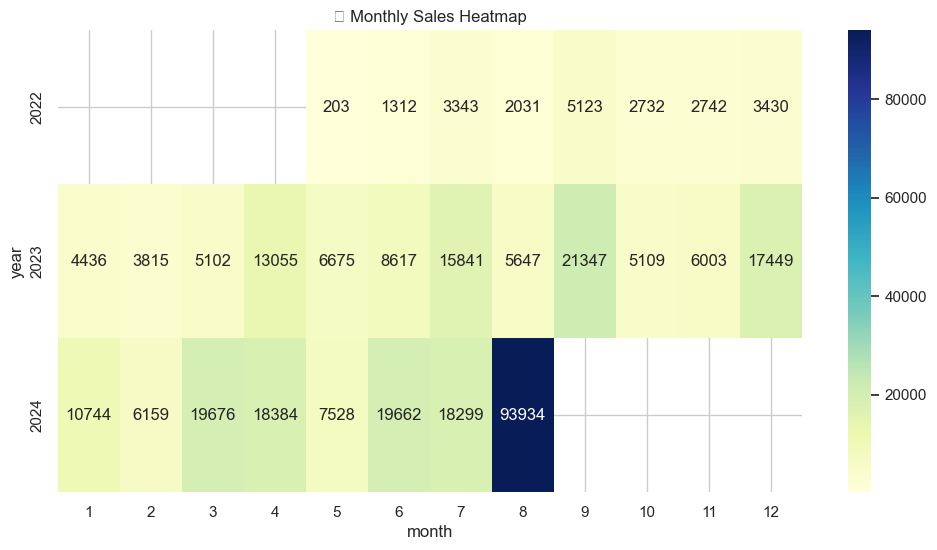

In [176]:


heatmap_data = df.groupby(['year', 'month'])['quantity'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("📆 Monthly Sales Heatmap")
plt.show()


# 6.3 Boxplot by Channel/Category

C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


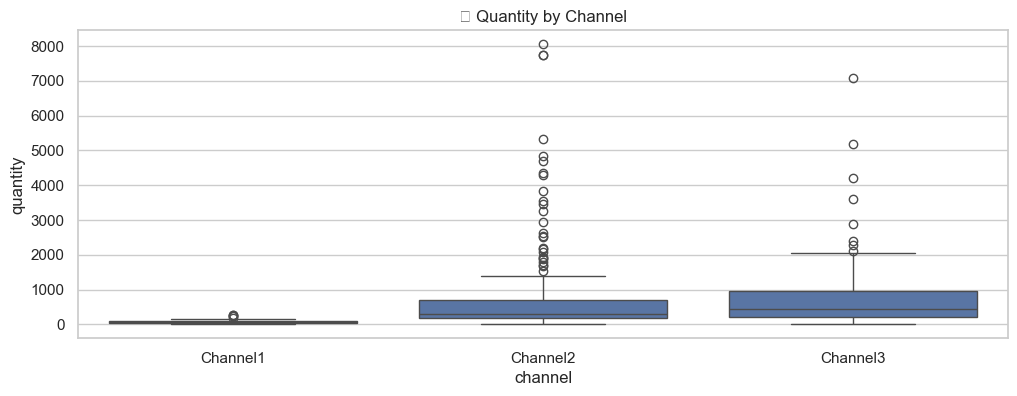

C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


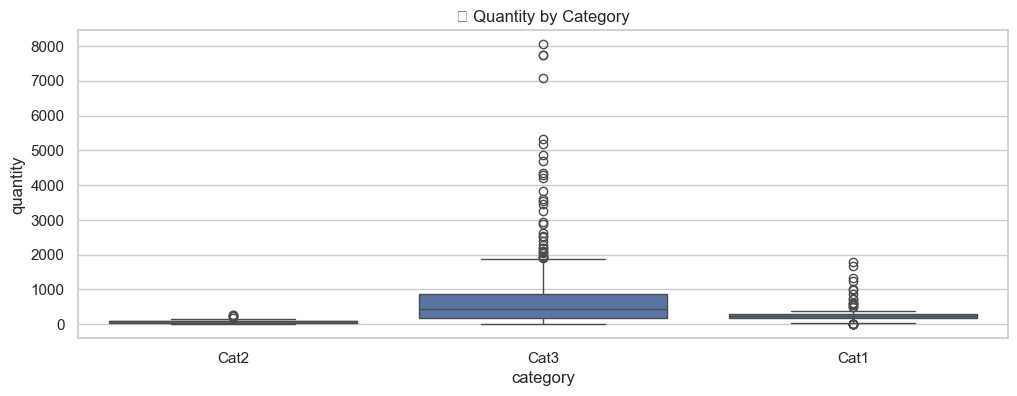

In [177]:

plt.figure(figsize=(12, 4))
sns.boxplot(x='channel', y='quantity', data=df)
plt.title("🎯 Quantity by Channel")
plt.show()

plt.figure(figsize=(12, 4))
sns.boxplot(x='category', y='quantity', data=df)
plt.title("🎯 Quantity by Category")
plt.show()


## 7 ADVANCED DATA ANALYSIS

# 7.1. Product Segmentation by Sales Volume

In [178]:
total_sales = df.groupby('SerialNum')['quantity'].sum()
df['sales_segment'] = df['SerialNum'].map(
    lambda x: 'High' if total_sales[x] > total_sales.quantile(0.8)
    else 'Low' if total_sales[x] < total_sales.quantile(0.2)
    else 'Mid'
)


Text(0.5, 1.0, ' Product Segmentation by Volume')

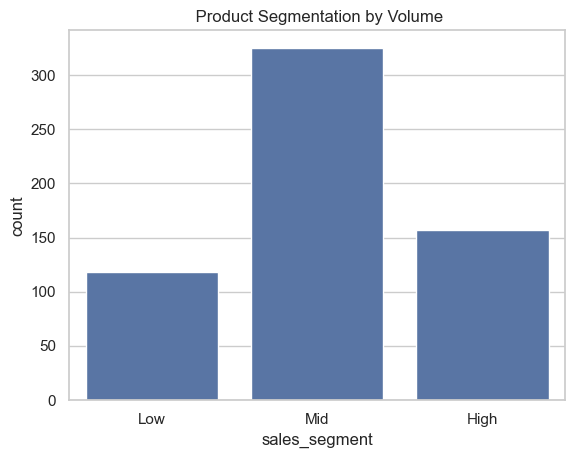

In [179]:
sns.countplot(x='sales_segment', data=df)
plt.title(" Product Segmentation by Volume")


# 7.2 Seasonal Decomposition of Time Series

C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


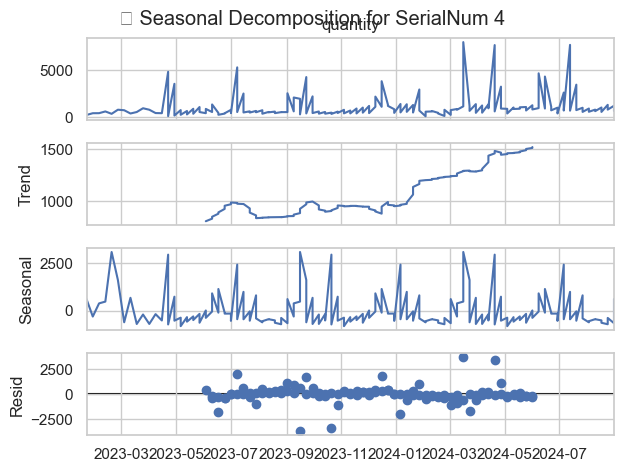

In [180]:
from statsmodels.tsa.seasonal import seasonal_decompose

top = df[df['SerialNum'] == top_serials[0]].copy()
top.set_index('weekend_date', inplace=True)
result = seasonal_decompose(top['quantity'], model='additive', period=52)
result.plot()
plt.suptitle(f"📉 Seasonal Decomposition for SerialNum {top_serials[0]}")
plt.show()


# 7.3 Volatility Analysis (Sales Consistency)

In [181]:
volatility = df.groupby('SerialNum')['quantity'].std().sort_values()
volatility.head() 
volatility.tail()  


SerialNum
1      46.706561
5     300.516730
2     355.973011
3    1061.156980
4    1339.537542
Name: quantity, dtype: float64

# SerialNum
1.      46.71   → Very stable product (low week-to-week fluctuation)
5.     300.52   → Moderate volatility
2.     355.97   → Higher variability
3.     1061.16   → Highly unstable, possibly impacted by promotions, events
4.     1339.54   → Most volatile product in the list


# 7.4. Channel/Brand Distribution Over Time

Text(0, 0.5, 'Units Sold')

C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


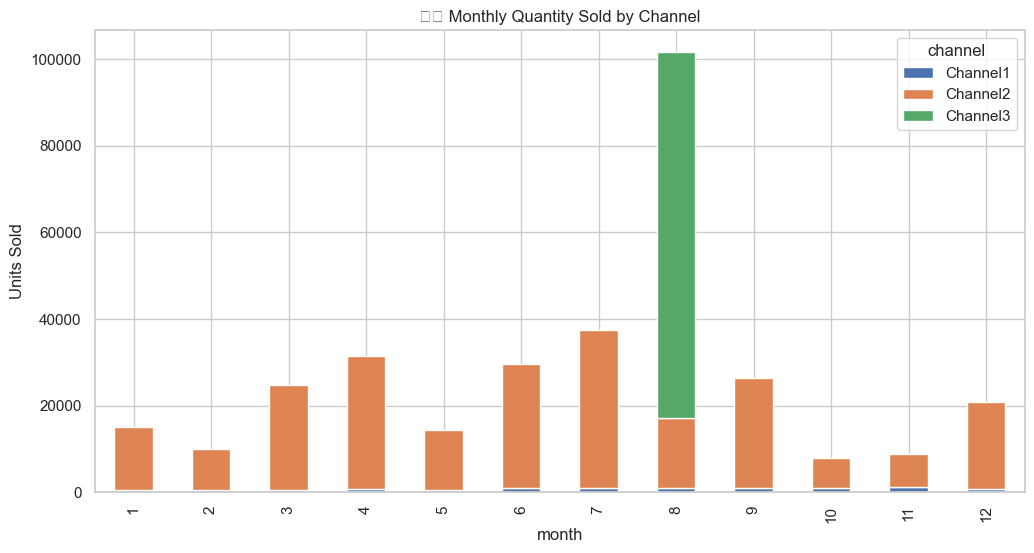

In [182]:
monthly_channel = df.groupby(['month', 'channel'])['quantity'].sum().unstack()
monthly_channel.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("🛍️ Monthly Quantity Sold by Channel")
plt.ylabel("Units Sold")


# 7.5 Correlation Heatmap for Numeric Features

Text(0.5, 1.0, '🔁 Correlation Heatmap')

C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


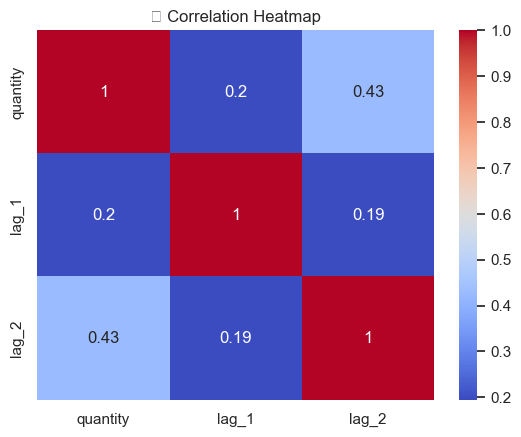

In [183]:

df['lag_1'] = df.groupby('SerialNum')['quantity'].shift(1)
df['lag_2'] = df.groupby('SerialNum')['quantity'].shift(2)


corr = df[['quantity', 'lag_1', 'lag_2']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("🔁 Correlation Heatmap")


# 7.6 Calendar Events / Outlier Detection 

In [184]:
from scipy import stats

df['z_score'] = df.groupby('SerialNum')['quantity'].transform(lambda x: stats.zscore(x, nan_policy='omit'))
outliers = df[df['z_score'].abs() > 3]


C:\Users\bhavi\AppData\Local\Temp\ipykernel_27540\700247083.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\bhavi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


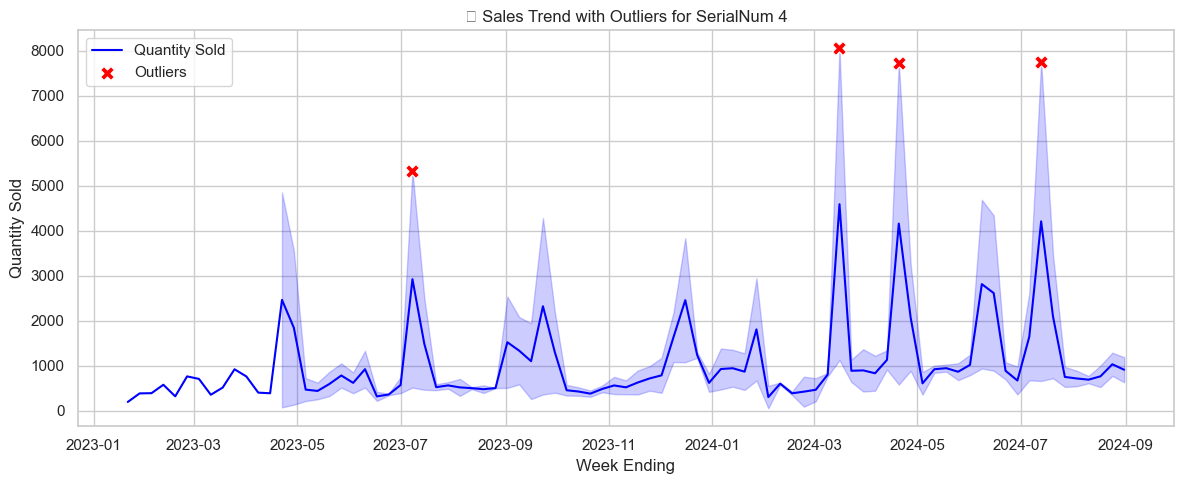

In [185]:
import matplotlib.pyplot as plt

serial = top_serials[0]
data = df[df['SerialNum'] == serial]
outlier_data = outliers[outliers['SerialNum'] == serial]

plt.figure(figsize=(12, 5))
sns.lineplot(data=data, x='weekend_date', y='quantity', label='Quantity Sold', color='blue')
sns.scatterplot(data=outlier_data, x='weekend_date', y='quantity', label='Outliers', color='red', s=100, marker='X')

plt.title(f"📉 Sales Trend with Outliers for SerialNum {serial}")
plt.ylabel("Quantity Sold")
plt.xlabel("Week Ending")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [186]:
# Save cleaned and sorted data for use in modeling
output_path = '../outputs/cleaned_sales.csv'
df.to_csv(output_path, index=False)

print(f"✅ Cleaned dataset saved to: {output_path}")


✅ Cleaned dataset saved to: ../outputs/cleaned_sales.csv
